In [85]:
from layer import Dense, Dropout, Conv2d, Flatten, MaxPool2d
from activation import LeakyReLU
from solver import SGD
from loss import CrossEntropyLoss
from data import Dataset
from network import Network
from utils import *

import numpy as np
import matplotlib.pyplot as plt
import joblib

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)

# CIFAR

In [86]:
cifar_labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# get channels 2nd
X_train = X_train.transpose(0, 3, 1, 2)
X_test = X_test.transpose(0, 3, 1, 2)

In [ ]:
# data to 1d array
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# one hot
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

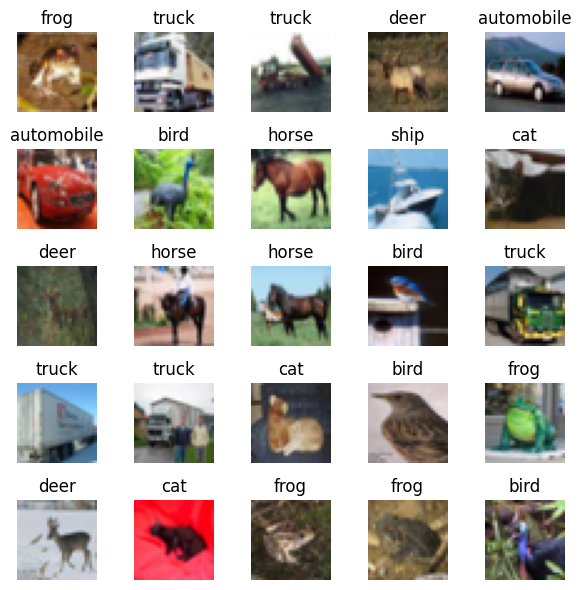

In [89]:
show_grid(X_train[:25], y_train[:25], class_names=cifar_labels)

In [90]:
# normalization
mean = np.mean(X_train, axis=(0,2,3)).reshape(1, 3, 1, 1)
std = np.std(X_train, axis=(0,2,3)).reshape(1, 3, 1, 1)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [91]:
# create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

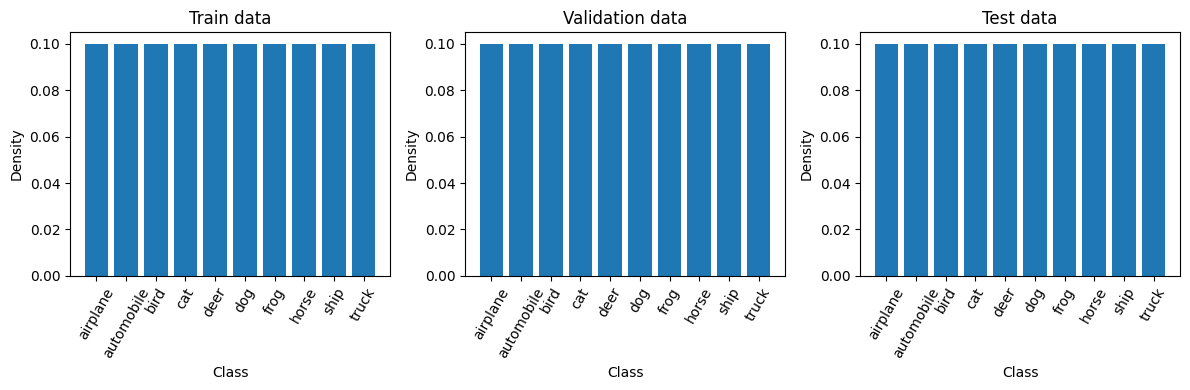

In [92]:
plot_class_balance([np.argmax(y_train, axis=1), np.argmax(y_val, axis=1), np.argmax(y_test, axis=1)], cifar_labels, tilt=60)

In [93]:
train_data = Dataset(X_train, y_train)
val_data = Dataset(X_val, y_val)
test_data = Dataset(X_test, y_test)